### Описание плана и цели проекта

**Проектная работа**

Procrastinate Pro+ является приложением. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Цель проекта - разобраться в причинах и сделать выводы.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

лог сервера с данными об их посещениях,
выгрузка их покупок за этот период,
рекламные расходы.
Нужно понять:

откуда приходят пользователи и какими устройствами они пользуются,
сколько стоит привлечение пользователей из различных рекламных каналов;
сколько денег приносит каждый клиент,
когда расходы на привлечение клиента окупаются,
какие факторы мешают привлечению клиентов.
Описание данных

visits_info_short.csv — лог сервера с информацией о посещениях сайта,

orders_info_short.csv — информацию о заказах,

costs_info_short.csv — информацию о расходах на рекламу.

Структура visits_info_short.csv:

User Id — уникальный идентификатор пользователя,
Region — страна пользователя,
Device — тип устройства пользователя,
Channel — идентификатор источника перехода,
Session Start — дата и время начала сессии,
Session End — дата и время окончания сессии.
Структура orders_info_short.csv:

User Id — уникальный идентификатор пользователя,
Event Dt — дата и время покупки,
Revenue — сумма заказа.
Структура costs_info_short.csv:

dt — дата проведения рекламной кампании,
Channel — идентификатор рекламного источника,
costs — расходы на эту кампанию.

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs  = pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
visits.head(10)


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


In [4]:
orders.head(1)


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99


In [5]:

costs.head(1)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3


In [6]:
len(visits)- len(visits.drop_duplicates())

0

In [7]:
len(orders)- len(orders.drop_duplicates())

0

In [8]:
len(costs)- len(costs.drop_duplicates())

0

Дубликатов нет

In [9]:
visits.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [10]:
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [11]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Пропусков нет

In [12]:
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']
orders.columns = ['user_id', 'event_dt', 'revenue']
costs.columns = ['dt', 'channel', 'costs']

Нижний регистр

In [13]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

orders['event_dt'] = pd.to_datetime(orders['event_dt'])

costs['dt'] = pd.to_datetime(costs['dt']).dt.date

Типы данных во всех колонках соответствуют сохранённым в них значениям. 

**Первичная работа с данными проведена. Материал готов к дальнейшему изучнию**



### Функции для расчёта и анализа LTV, ROI, удержания и конверсии.




А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

Создаем профили пользователей при помощи функции

In [14]:
def get_profiles(visits, orders, costs):

    
    profiles = (visits.sort_values(by=['user_id', 'session_start'])
                .groupby('user_id')
                .agg({'session_start': 'first', 'channel': 'first', 'device': 'first', 'region': 'first'})
                .rename(columns={'session_start': 'first_ts'})
                .reset_index())

    
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

   
    new_users = (profiles.groupby(['dt', 'channel'])
                 .agg({'user_id': 'nunique'})
                 .rename(columns={'user_id': 'unique_users'})
                 .reset_index())

    
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    
    profiles = profiles.merge(costs[['dt', 'channel', 'acquisition_cost']],
                              on=['dt', 'channel'],
                              how='left',)

    
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles 

Расчитываем коэффициент удержания при помощи функции

In [15]:
def get_retention(profiles, sessions, observation_date, horizon_days, dimensions=[], ignore_horizon=False):

    
    dimensions = ['payer'] + dimensions


    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    
    result_raw = result_raw.merge(sessions[['user_id', 'session_start']], on='user_id', how='left')
    
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days

    
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'}))
        
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
 )   

    
    return result_raw, result_grouped, result_in_time 

Расчитываем конверсию при помощи функции

In [16]:
def get_conversion(profiles, purchases, observation_date, horizon_days, dimensions=[], ignore_horizon=False):

    
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    first_purchases = (purchases.sort_values(by=['user_id', 'event_dt'])
                       .groupby('user_id')
                       .agg({'event_dt': 'first'})
                       .reset_index())

    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left')

    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique')
        result = result.fillna(0).cumsum(axis = 1)
        
        cohort_sizes = (df.groupby(dims)
                        .agg({'user_id': 'nunique'})
                        .rename(columns={'user_id': 'cohort_size'}))
        
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        
        
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)


    if 'cohort' in dimensions:dimensions = []

    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)

    return result_raw, result_grouped, result_in_time

Расчитываем LTV и ROI при помощи функции

In [17]:
def get_ltv(profiles, purchases, observation_date,  horizon_days, dimensions=[], ignore_horizon=False):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    result_raw = result_raw.merge(purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left')

    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
      
        result = df.pivot_table(index=dims, columns='lifetime', values='revenue', aggfunc='sum')
      
        result = result.fillna(0).cumsum(axis=1)
        
        cohort_sizes = (df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns={'user_id': 'cohort_size'}))
       
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        
        result = result.div(result['cohort_size'], axis=0)
        
        result = result[['cohort_size'] + list(range(horizon_days))]
       
        result['cohort_size'] = cohort_sizes

      
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

     
        cac = (cac.groupby(dims).agg({'acquisition_cost': 'mean'}).rename(columns={'acquisition_cost': 'cac'}))

       
        roi = result.div(cac['cac'], axis=0)

        
        roi = roi[~roi['cohort_size'].isin([np.inf])]

      
        roi['cohort_size'] = cohort_sizes

        
        roi['cac'] = cac['cac']

  
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        
        return result, roi

   
    result_grouped, roi_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    
    if 'cohort' in dimensions:
        dimensions = []

   
    result_in_time, roi_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)

    return (
        result_raw,  
        result_grouped,  
        result_in_time, 
        roi_grouped, 
        roi_in_time, 
    ) 



**Созданы функции
get_profiles() — для создания профилей пользователей,
get_retention() — для подсчёта Retention Rate,
get_conversion() — для подсчёта конверсии,
get_ltv() — для подсчёта LTV.**



Функция для графика  - сглаживание данных

In [18]:
def filter_data(df, window):
   
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

Функция построение графика Retention Rate

In [19]:
def plot_retention(retention, retention_history, horizon, window=7):

    
    plt.figure(figsize=(15, 10))

    retention = retention.drop(columns=['cohort_size', 0])
    
    retention_history = retention_history.drop(columns=['cohort_size'])[[horizon - 1]]

    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.ylabel('Коэф. удержания')
    plt.title('Удержание платящих пользователей')


    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(grid=True, ax=ax2)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')


    ax3 = plt.subplot(2, 2, 3)
  
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']]
  
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.ylabel('Коэф. удержания')
    plt.title('Динамика удержания платящих пользователей'.format(horizon))

    ax4 = plt.subplot(2, 2, 4, sharey=ax3)

    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика удержания неплатящих пользователей'.format(horizon))
    
    plt.tight_layout()
    plt.show()

Функция для построения графика конверсии

In [20]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

   
    plt.figure(figsize=(15, 5))

 
    conversion = conversion.drop(columns=['cohort_size'])
 
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]]

    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.ylabel('Конверсия')
    plt.title('Конверсия пользователей')

    
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        
        name for name in conversion_history.index.names if name not in ['dt']]
    
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей '.format(horizon))

    plt.tight_layout()
    plt.show()

Функция для визуализации LTV и ROI

In [21]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

   
    plt.figure(figsize=(15, 10))

    
    ltv = ltv.drop(columns=['cohort_size'])
    
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

   
    cac_history = roi_history[['cac']]

   
    roi = roi.drop(columns=['cohort_size', 'cac'])
    
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

   
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.ylabel('Значение LTV')
    plt.title('LTV')

    
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Месяц привлечения')
    plt.ylabel('Значение LTV')
    plt.title('Динамика LTV пользователей '.format(horizon))

    
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean')
    
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Месяц привлечения')
    plt.ylabel('Уровень САС')
    plt.title('Динамика стоимости привлечения пользователей')

    
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.ylabel('Уровень окупаемости')
    plt.title('ROI')
    
    
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Месяц привлечения')
    plt.title('Динамика ROI пользователей'.format(horizon))

    plt.tight_layout()
    plt.show()



**filter_data() — для сглаживания данных,
plot_retention() — для построения графика Retention Rate,
plot_conversion() — для построения графика конверсии,
plot_ltv_roi — для визуализации LTV и ROI.**

Пункт выполнен. Прописаны функции для построения графиков.
Визуализация необходима для изучения метрик

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

Профили пользователей

In [22]:
profiles = get_profiles(visits, orders, costs)
profiles.head(10)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
5,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,2019-05-01,False,0.000000
6,38448301,2019-08-16 11:56:00,organic,Android,United States,2019-08-16,2019-08-01,False,0.000000
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-01,False,1.128205
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-01,False,0.250435


Определяем дату проведения исследования 

In [23]:
observation_date = datetime(2019, 11, 1).date()


Горизонт

In [24]:
#horizon_days = 14

Минимальная и максимальная даты привлечения пользователей.

In [25]:
min_analysis_date = costs['dt'].min()
min_analysis_date

datetime.date(2019, 5, 1)

In [26]:
min_analysis_date = costs['dt'].max()
min_analysis_date

datetime.date(2019, 10, 27)

In [27]:
#max_analysis_date = observation_date - timedelta(days=horizon_days - 1)
#max_analysis_date

Страны из которых пользователи приходят в приложение и на какую страну приходится больше всего платящих.

In [28]:
country = profiles.groupby('region').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})
country = country.reset_index()
country['paying'] = country['payer', 'mean'] * 100
country = round(country.drop(country.columns[[3]], axis=1), 1).sort_values('paying',ascending= False)
country

,region,user_id,payer,paying
,,nunique,sum,
3,United States,100002,6902,6.9
1,Germany,14981,616,4.1
2,UK,17575,700,4.0
0,France,17450,663,3.8


Процент наиболее платящих пользователей из США - 6.9 "paying" Лидирующее с отрывов кол-во их в общей базе.

Аналогичным образом выводим типы устройств и процент платящих по ним

In [29]:
dev = profiles.groupby('device').agg({'user_id': 'nunique', 'payer': 'sum'}).sort_values(by='payer', ascending=False)
dev = dev.reset_index()
dev['paying'] = round(dev.payer / dev.user_id * 100, 1)
dev

,device,user_id,payer,paying
0,iPhone,54479,3382,6.2
1,Android,35032,2050,5.9
2,Mac,30042,1912,6.4
3,PC,30455,1537,5.0


Процент наиболее платящих пользователей - 6.4 "paying" c Mac. C iPhone  - 6.2.  Общее лидерство за Apple

**Изучаем  рекламные источники привлечения и определяем каналы, из которых пришло больше всего платящих пользователей. Строим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.**

In [30]:
channels = profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': 'sum'}).sort_values(by='payer', ascending=False)
channels['paying'] = round(channels.payer / channels.user_id * 100, 1)
channels

,user_id,payer,paying
channel,,,
FaceBoom,29144,3557,12.2
TipTop,19561,1878,9.6
organic,56439,1160,2.1
WahooNetBanner,8553,453,5.3
AdNonSense,3880,440,11.3
RocketSuperAds,4448,352,7.9
LeapBob,8553,262,3.1
OppleCreativeMedia,8605,233,2.7
lambdaMediaAds,2149,225,10.5


 FaceBoom лидирует по числу платящих и проценту.  

**Вывод Исследовательский анализ данных**

Для анализа маркетинговых исследований был выбран 14-ти дневный горизонт.

В результате группировки данных были выявлены: 

 Страны. США, Франция, Германия, Великобритания. Лидеры - потребители из США, при этом, как кол-во, так и процент платящих.
 
 Устройства.  PC, iPhone, Android, Mac. В лидерах iPhone.
 
 Каналы привлечения. Их 10. Лидер FaceBoom. Органические клиенты в 2 раза превосходят лидера по кол-ву и в 6 раз имеют меньший    процент, как платящих. 







### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

Расход на маркетинг составил

In [31]:
round(profiles.acquisition_cost.sum())


105497

Распределение по рекламным источникам, то есть сколько денег потратили на каждый источник. Таблица

In [32]:
channels_combined = profiles.groupby('channel').agg({'acquisition_cost':'sum'}).sort_values(by='acquisition_cost', ascending=False)
channels_combined = channels_combined.reset_index()
channels_combined = channels_combined[channels_combined.channel != 'organic']
channels_combined

,channel,acquisition_cost
0,TipTop,54751.30
1,FaceBoom,32445.60
2,WahooNetBanner,5151.00
3,AdNonSense,3911.25
4,OppleCreativeMedia,2151.25
5,RocketSuperAds,1833.00
6,LeapBob,1797.60
7,lambdaMediaAds,1557.60
8,MediaTornado,954.48
9,YRabbit,944.22


TipTop, FaceBoom - каналы, на  которые расходы составляли наиболее значимые суммы.

Визуализация динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.
График.

In [33]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs['week'] = costs['dt'].dt.isocalendar().week
costs['month'] = costs['dt'].dt.month
display(costs.groupby('month').agg({'costs': 'sum'}))

,costs
month,
5,9978.570
6,15090.045
7,16447.060
8,20657.870
9,22441.340
10,20882.415


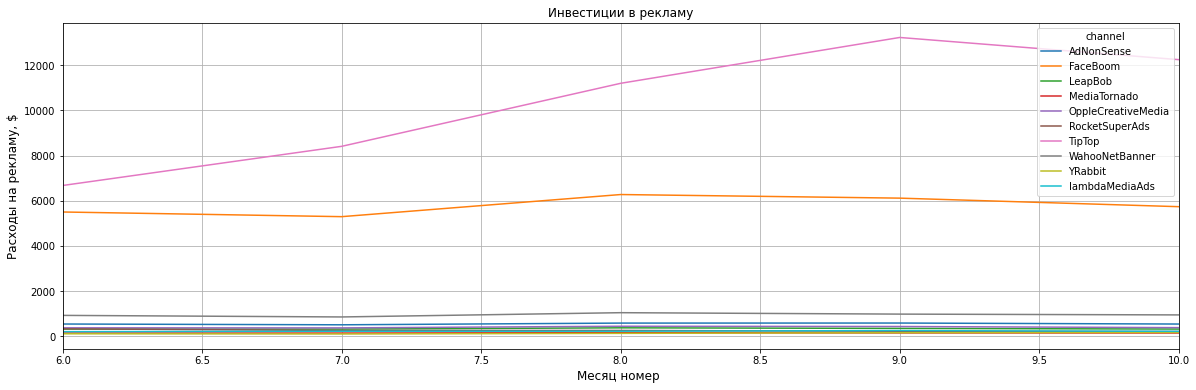

In [34]:
costs.pivot_table(index='month', columns='channel',
                  values='costs', aggfunc='sum').plot(figsize=(20, 6), xlim=(6, 10), grid=True)
plt.title('Инвестиции в рекламу')
plt.xlabel('Месяц номер ', fontsize=12)
plt.ylabel('Расходы на рекламу, $', fontsize=12)
plt.show()

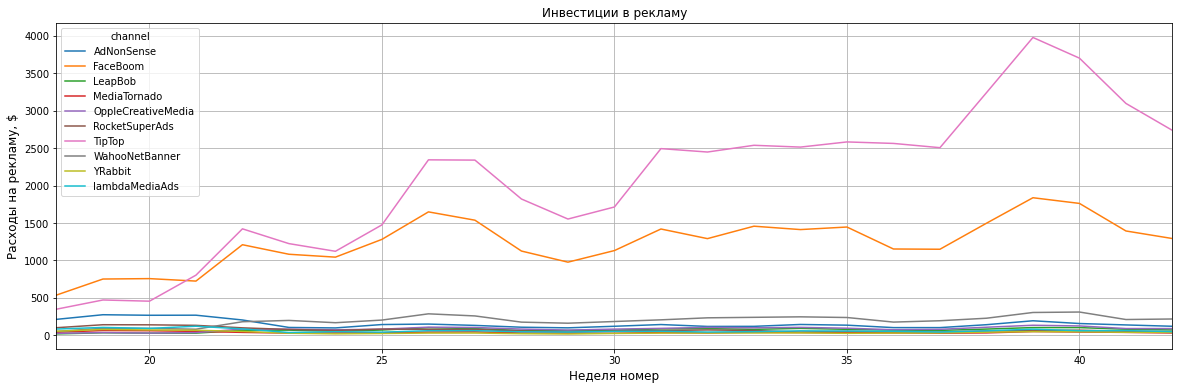

In [35]:
costs.pivot_table(index='week', columns='channel',
                  values='costs', aggfunc='sum').plot(figsize=(20, 6), xlim=(18, 42), grid=True)
plt.title('Инвестиции в рекламу')
plt.xlabel('Неделя номер', fontsize=12)
plt.ylabel('Расходы на рекламу, $', fontsize=12)
plt.show()

TipTop, FaceBoom  имеют  динамику роста вложений. На TipTop денег тратилось больше. С июля по октябрь рост вложений наиболее выраженый



Стоимость в среднем привлечение одного пользователя (CAC) из каждого источника

In [36]:
cac = round((profiles.groupby('channel').agg({'acquisition_cost': 'mean'}).rename(columns={'acquisition_cost': 'cac'})), 2)                                   
cac = cac.reset_index()
cac = cac[cac.channel != 'organic'].sort_values(by='cac', ascending=False)
cac

,channel,cac
6,TipTop,2.80
1,FaceBoom,1.11
0,AdNonSense,1.01
9,lambdaMediaAds,0.72
7,WahooNetBanner,0.60
5,RocketSuperAds,0.41
4,OppleCreativeMedia,0.25
3,MediaTornado,0.22
8,YRabbit,0.22
2,LeapBob,0.21


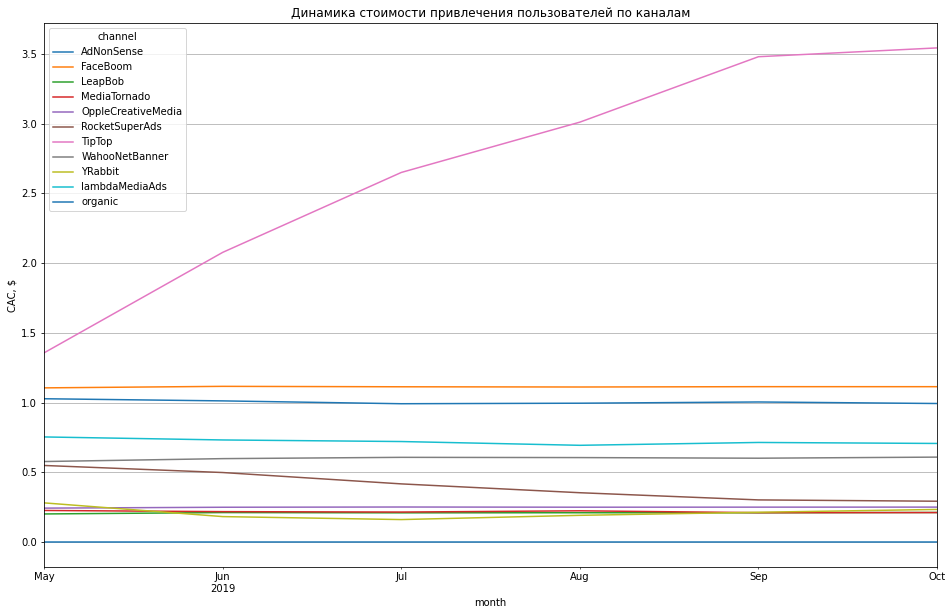

In [37]:
profiles.pivot_table(index='month', columns='channel', values='acquisition_cost', aggfunc='mean').plot(grid=True, figsize=(16, 10))
plt.ylabel('CAC, $')
plt.title('Динамика стоимости привлечения пользователей по каналам')
plt.show()

**Вывод Исследовательский анализ данных**


FaceBoom и TipTop - каналы, получившие наибольшие инвестиции, относительно остальных. Период -осень, как наиболее активный по вложениям. 

Стоимость привлеченного клиента составила 2.8 доллара для TipTop
Стоимость привлеченного клиента составила 1.1 доллара для FaceBoom

За 5 месяцев на графике виден рост стоимости САС у ipTop. Рост примерно с той же отметки, что и стоимость FaceBoom.



### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

Для анализа и визуализации окупаемости рекламы используем фуннкции. Органических клиентов учитывать нет необходимости, на их привлечение не тартились средства. 

In [38]:
observation_date = datetime(2019, 11, 1).date()

In [39]:
horizon_days = 14

In [40]:
min_analysis_date = costs['dt'].min()
min_analysis_date

Timestamp('2019-05-01 00:00:00')

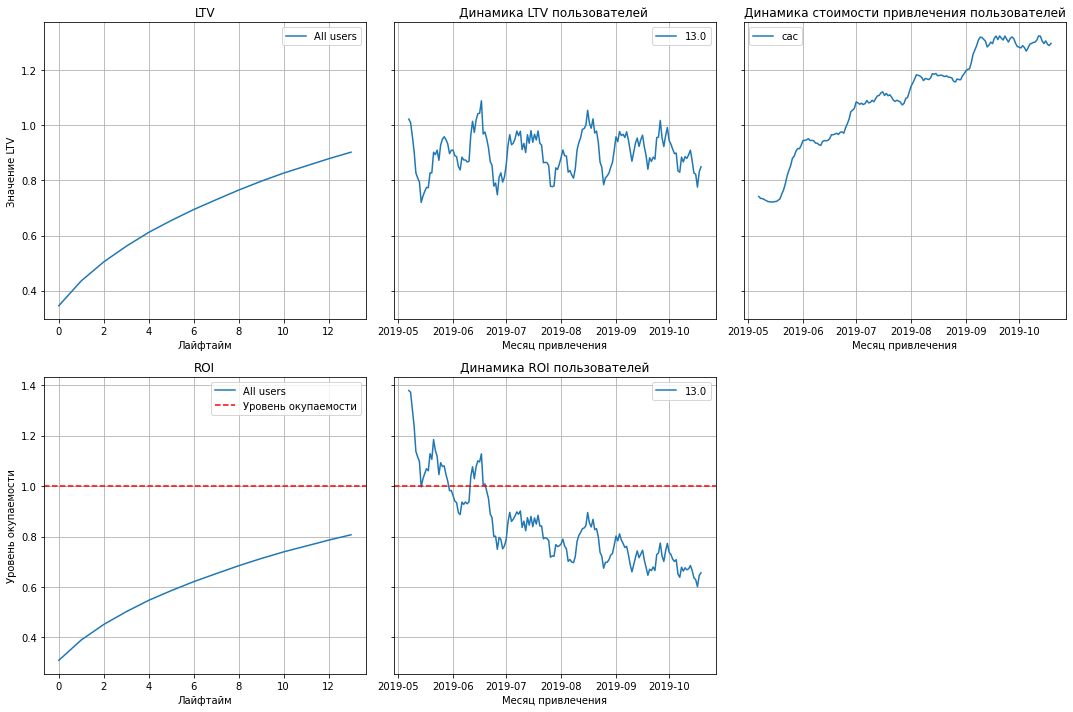

In [41]:
profiles = profiles.query('channel != "organic"')

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Реклама не окупается. К концу срока из ТЗ ( в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.) 
ROi составляет 0.81 - 81% от "дед лайна" по окупаемости.  LTV и САС имеет выраженый рост. В динамммке ROI падает

Далее необходимо визулизировать по странам, устройствам и источникам трафика. 

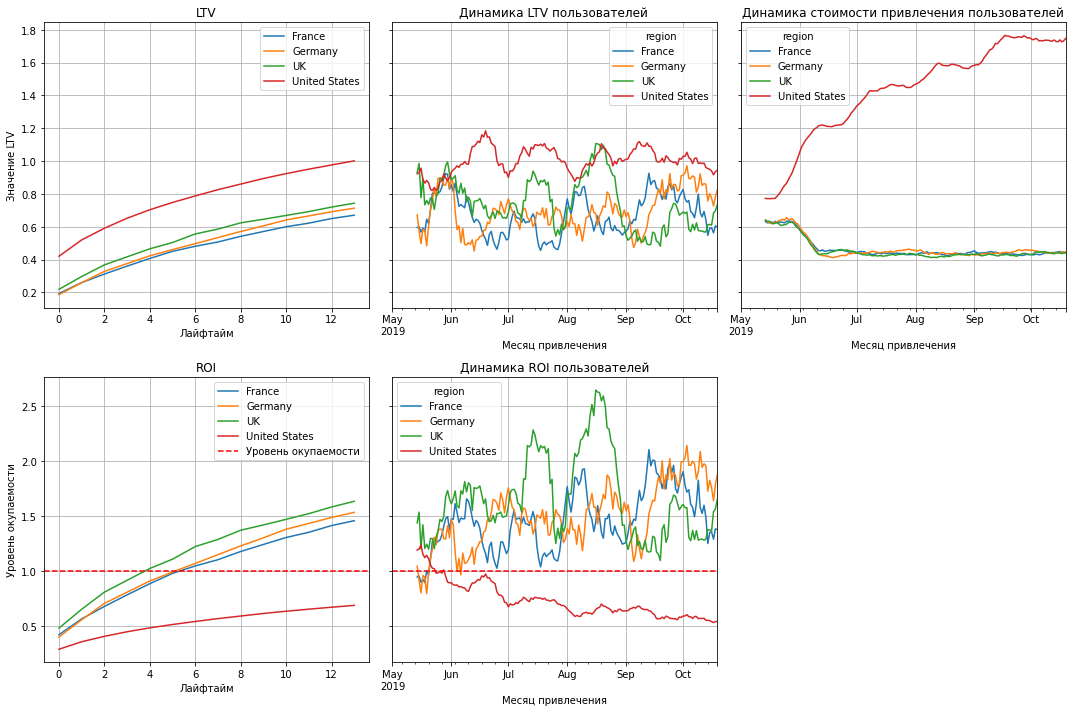

In [42]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

При разбивке по регионам выявлено, что реклама  по привлечению клиентов из региона США имеет наихудшие показатели. Причем этот регион тянет вниз общие показатели. США имеет наибольший рост САС на полугодичном промежутке времени. ROI ниже 70%. В динамике на полугодичном промежутке времени так же падает.

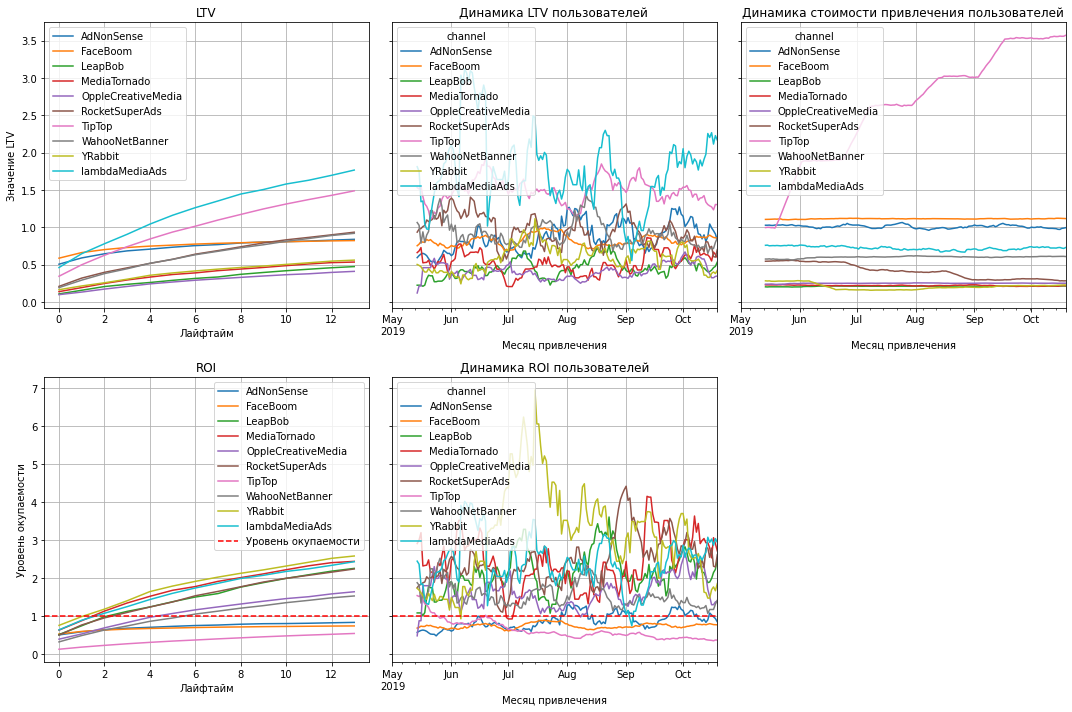

In [43]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

ПО ROI не окупились TipTop, AdNonSense, FaceBoom. По динамике САС TipTop явно дорожает на заданом промежутке времени. 
Необходимо рассмотреть возможность иначе распределить затратную часть по каналам. YRabbit лидирует по ROI. Во второй половине лета - наиболее выражено.

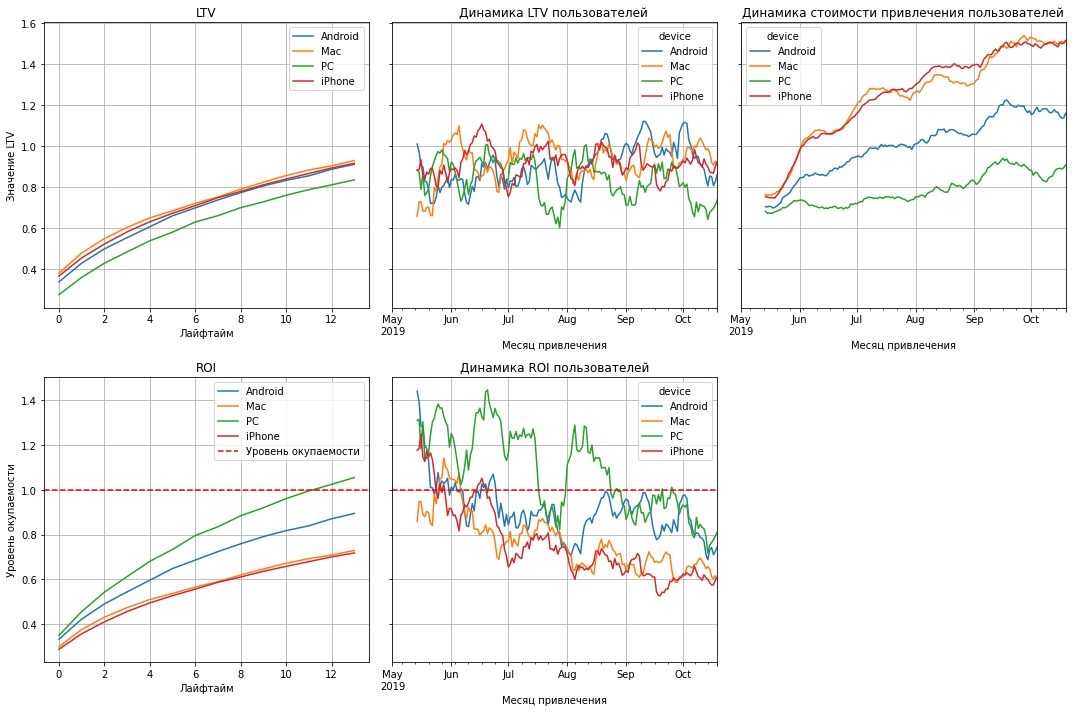

In [44]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

Общая тенденция по ROI - на снижение. На PC реклама едва окупается на горизонте в 14 дней. MAC и IPhone лидируют по САС  - необходимо обратить 
внимание на распределение средств. Аномалий нет- лидеры и аутсайдеры не слишком явные.

По таким же критериям, при помощи функций строим графики конверсии и удержания для дальнейшей работы.

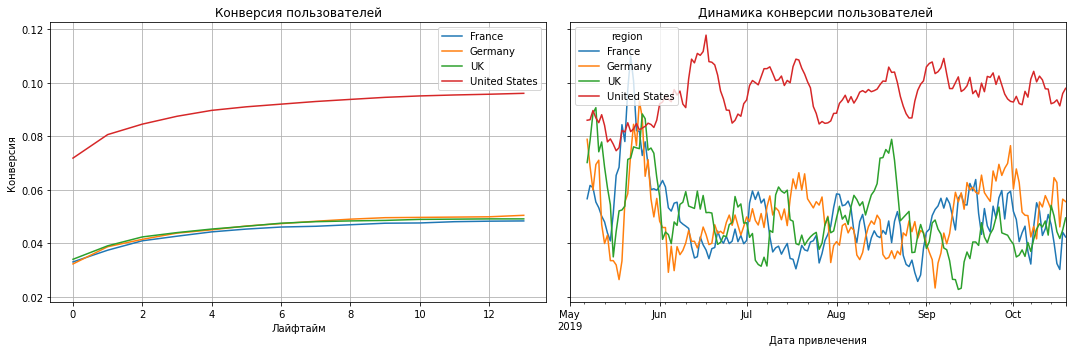

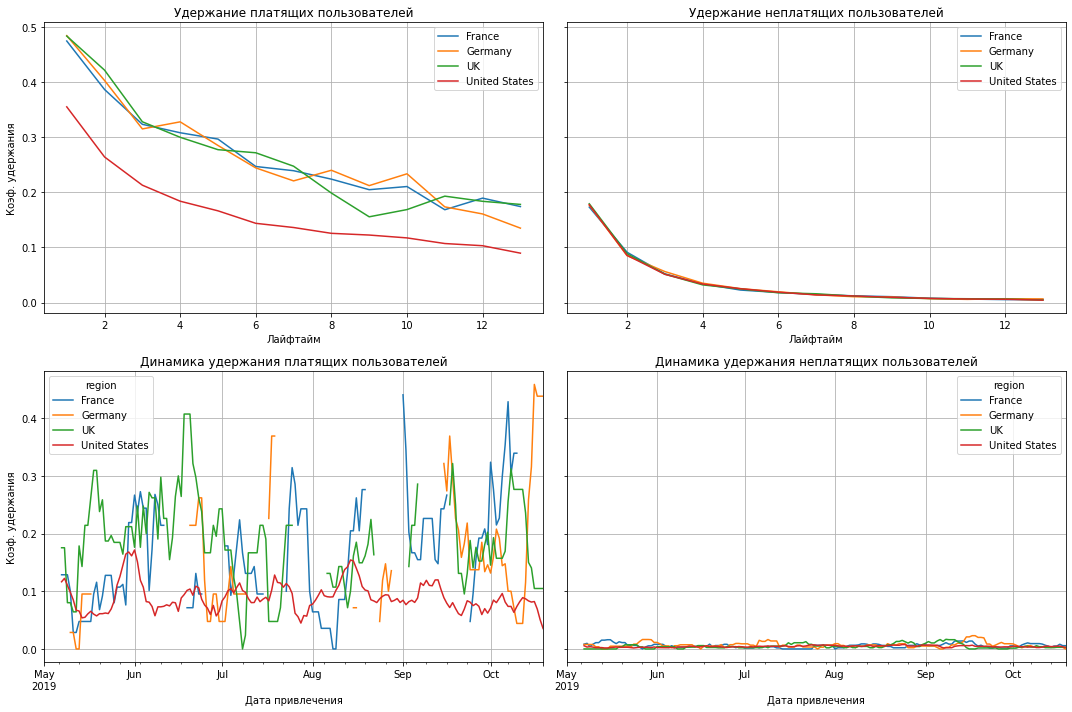

In [45]:
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

Лидирует по конверсии регион США. Все ,примерно, на одном уровне в динамике. С конверсией ничего предпринимать не нужно. 
Удеражание так же без аномалий.

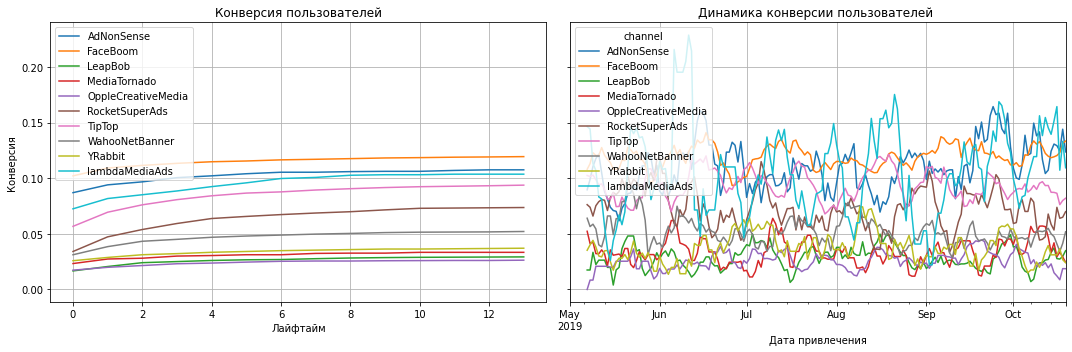

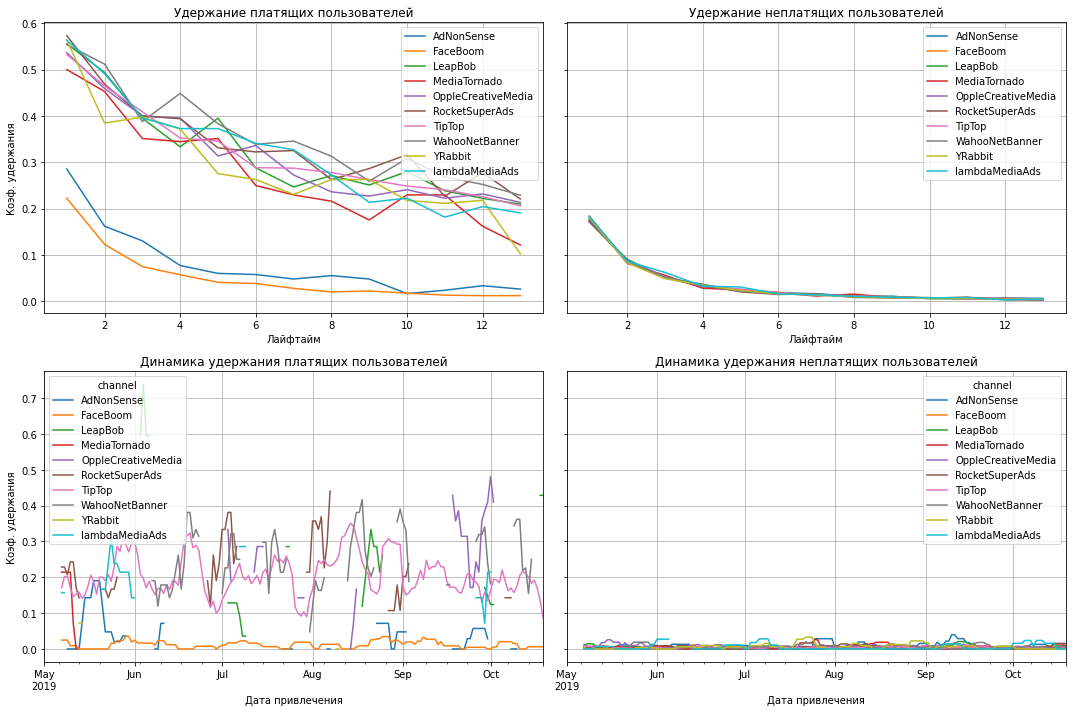

In [46]:
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

Рекламная компания провалена на каналах  AdNonSense и FaceBoom, на смотря на то, 
что конверсия у и FaceBoom незначительно выше всех. Исследуем далее девайсы...


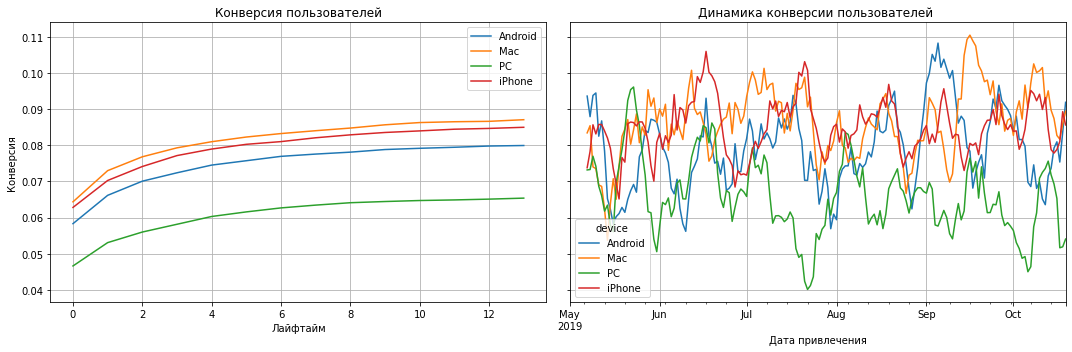

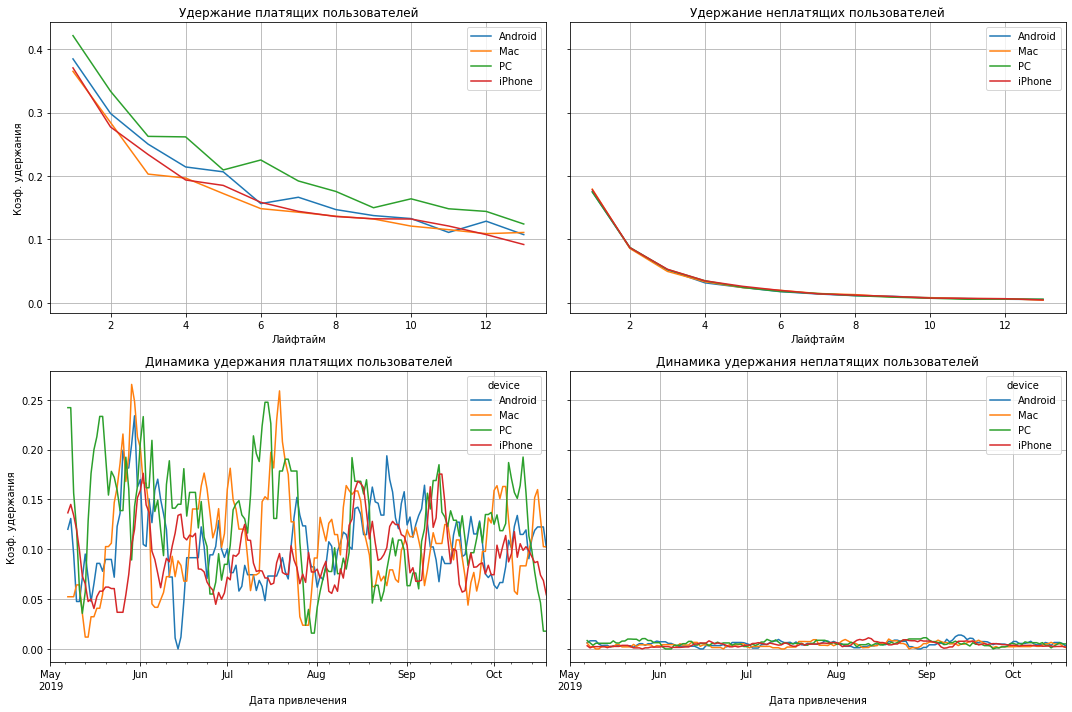

In [47]:
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

Конверсия худшая на PC. Лучшая у  iPhone и MAC. Остальные показатели по удержанию и динамикам примерно одинаковые. 

Для понимания и принятия правильного решения по оценке рекламных кампаний необходимо рассмотреть те же метрики, но по регионам.
Европа и США

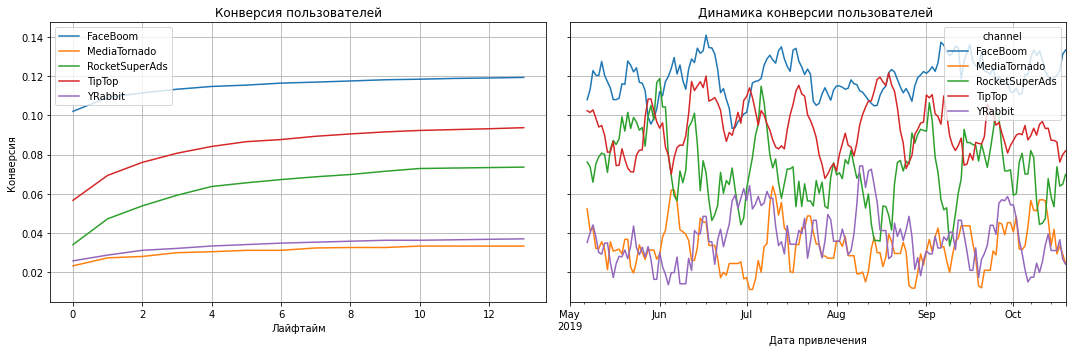

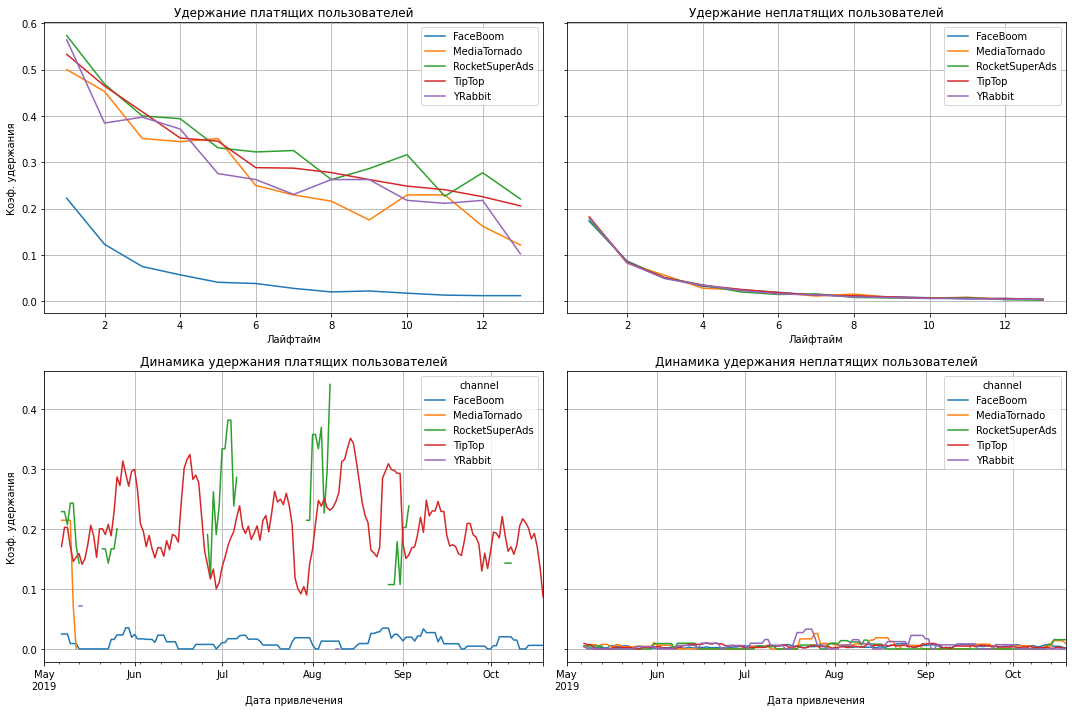

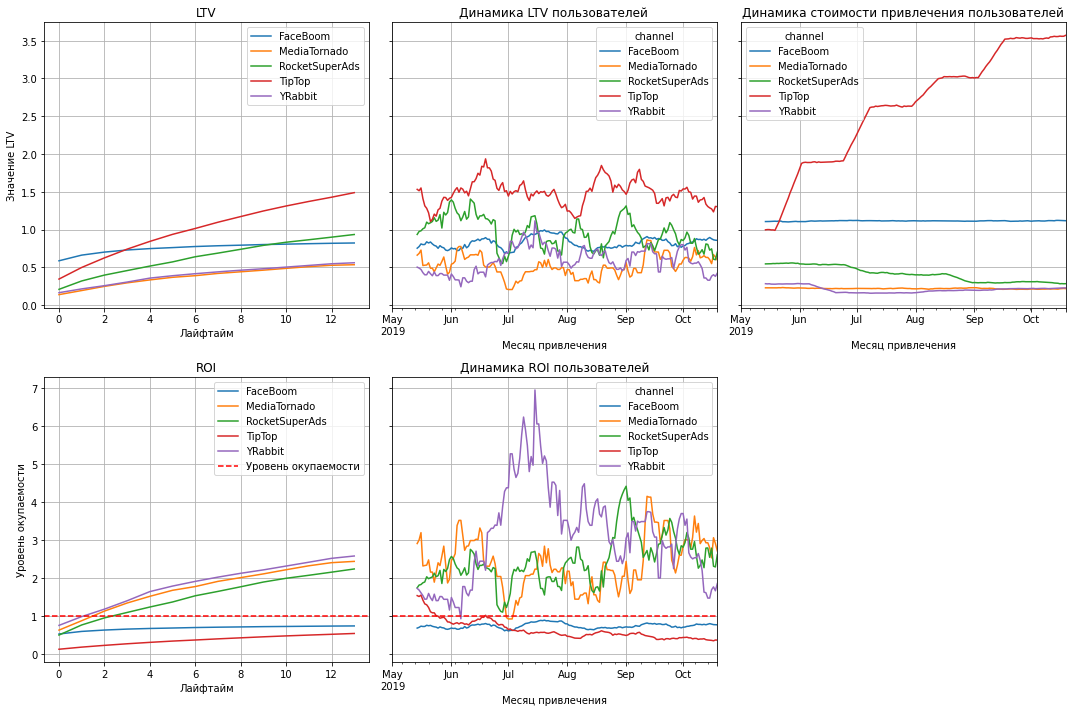

In [48]:
region_usa = profiles.query('region == "United States"')
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
region_usa , orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    region_usa, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days)

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    region_usa , orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

TipTop и FaceBoom из среза по американским пользователям явные претенденты на остановку взаимодействий с ними. Динамика удержания, динамика САС, ROI - свидельствуют об этом наглядно. 
Показатели с повышенной конверсией, относительно остальных, здесь не являются основным критерием.

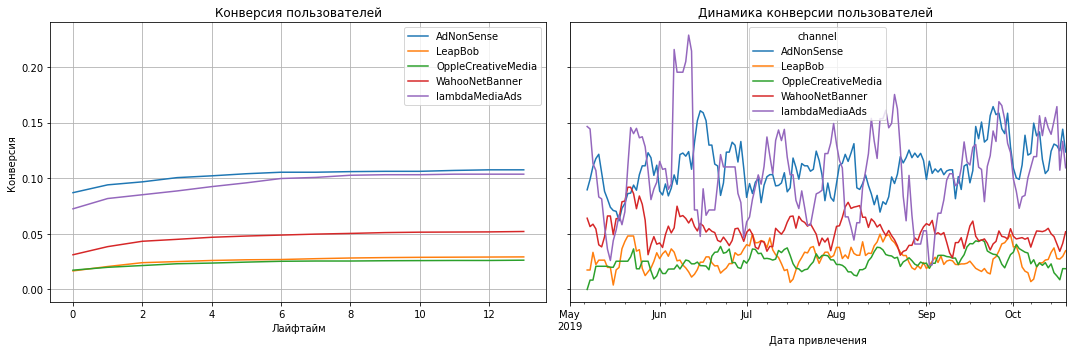

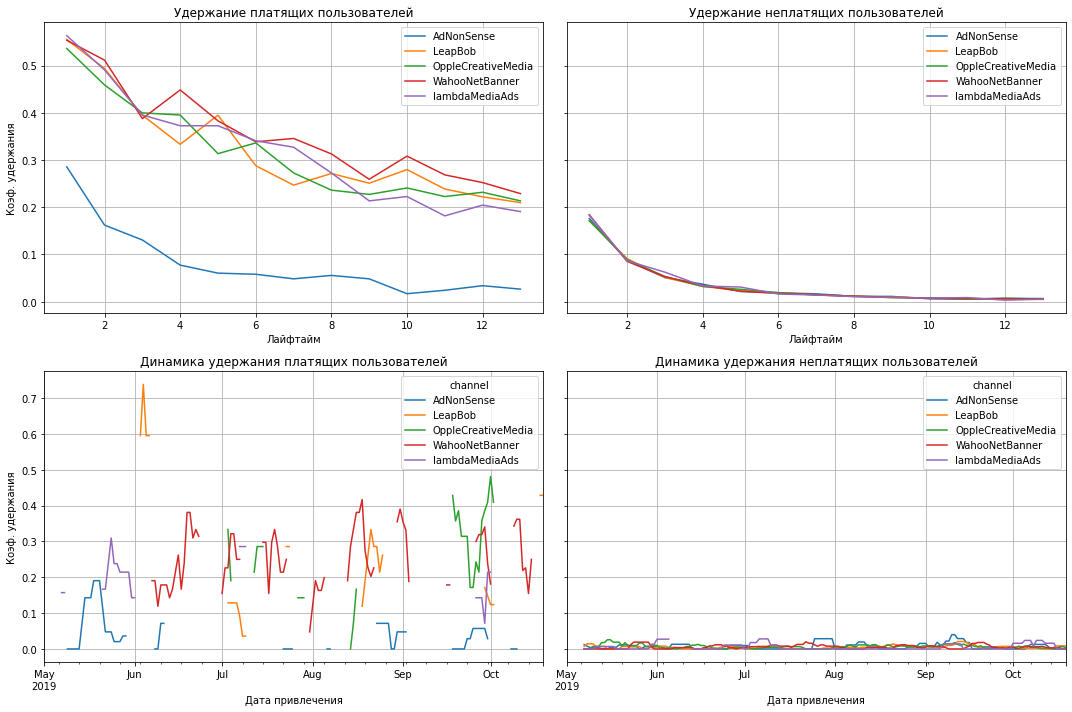

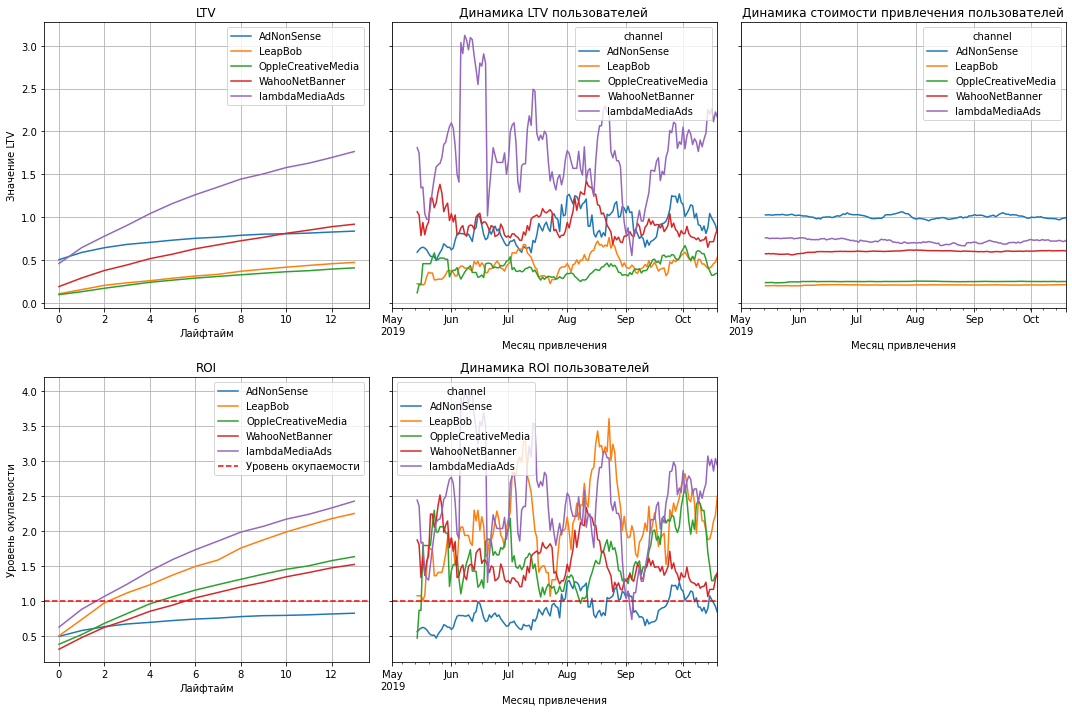

In [49]:
region_eu = profiles.query('region != "United States"')
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    region_eu, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    region_eu, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days)

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    region_eu, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

Для не американских пользователей необходимо пересмотеть работу с каналом AdNonSence.  У него худшие показатели, кроме митрики конверсии.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

**ВЫВОД**

   Основной причиной неэффективности привлечения пользователей является отсвутствие или несвоевременный анализ бизнес показателей  кейса по продаже приложения Procrastinate Pro+ за период с 1 мая по 27 октября 2019 года.  При анализе датасетов был выявлен ряд рекламных каналов, финансирование по которым необходимо перераспределить или остановить, ввиду их неэффективной работы.

В процессе изучения предоставленных данных были изучены нижеперечисленые статистические данные, которые помогут более качественному продвижению продукта на рынке.

Всего 4 региона.  
Лидирующий регион США. Лидирует по количеству платящих пользователей и по общему количеству пользователей. 

Представлено 4 устройства. с которых пользователи производили действия. Самое популярное - iPhone.
 
Имеется 10 поставщиков клиентов - рекламные каналы.

FaceBoom и TipTop являются замыми затратным, от них же и больше всего клиентов.
Вторая половина лета является наиболее затратной на рекламу, вообщем.

Пользователи по общим показателям приведенные из США наименее окупаемые, качество клиентов низкое, как по ROI так и по динамике САС (динамика удорожания затрат на привлечение).

TipTop,  AdNonSense, FaceBoom - каналы привлечения клиентов с наихудшими показателями. TipTop лидирует по показателю увеличения стоимости. У остальных нахудшие показатели по качеству клиентов - удержание их имеет низкие значения.


**Рекомендации**

При разбивке показателей окупаемости рекламы по двум регионам  было выявлено , что необходимо перераспределить финансирование 
-- в США - с канала FaceBoom и TipTop- они имеет худшую окупаемость и постоянно растущую стоимость за привлеченных клиентов.
Ниже дополнения....


LTV, удержание и конверсия показатели, которые на адекватном уровне у канала RocketSuperAds - средства необходимо перераспределить в его адрес. 

-- в Европе - с канала AdNonSense - не окупается, качествао клиентов низкое (удержание на неприемлемом уровне).

Каналы LeapBob и IambdaMediaAds являются наиболее преспективными. Их показатели конверсии не являются выдающимеся, но по качечеству клиентов они лучше других. LTV,  ROI и САС в совокупности с друкими усредненными показателями являются основанием перераспределить средства именно им. 

